<a href="https://colab.research.google.com/github/WilliamBuntu/Unsupervised_learning_Meds/blob/main/Unsupervised_Clustering_Meds_%26_Conditions_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised - Clustering : Meds & Conditions Feature

Several mental health diagnoses included for each patient and several medications, we trying to build a model which leans/predicts medications for a mental health diagnoses.
 when exporting medications and mental health diagnoses csv. join these two tables by  patient ID **bold text**
    1 . run the summary statistics on medications and mental health diagnoses csv generated in the AI slack channel
    2 . set up Clustering (train, validate,test: 60/20/20)
    3 . run clustering for "medication & mental health diagnoses csv "
    4 . Document the findings


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
#  medication and mental health diagnoses data
meds_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised_meds/data (1).csv')
conditions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised_meds/data (2).csv')


In [46]:
print(meds_df.columns)
print(conditions_df.columns)

Index(['p_id', 'medication_drug'], dtype='object')
Index(['p_id', 'diagnosis'], dtype='object')


In [5]:

conditions_df.head()


,p_id,diagnosis
0,9fa306ea-8cdf-4427-961e-1ac5480529af,Schizophrenia or other primary psychotic disor...
1,9fa306ea-8cdf-4427-961e-1ac5480529af,"Elimination disorders, Enuresis, Diurnal enuresis"
2,9fa306ea-8cdf-4427-961e-1ac5480529af,Disorders of bodily distress or bodily experience
3,9fa306ea-8cdf-4427-961e-1ac5480529af,Schizophrenia or other primary psychotic disor...
4,9fa306ea-8cdf-4427-961e-1ac5480529af,"Bipolar or Mood Related Disorders, Depressive ..."


In [6]:
print(meds_df.info())
print(conditions_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   p_id             571 non-null    object
 1   medication_drug  571 non-null    object
dtypes: object(2)
memory usage: 9.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   p_id       247 non-null    object
 1   diagnosis  247 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB
None


In [7]:
nan_count = meds_df.isnull().sum()
print(nan_count)

p_id               0
medication_drug    0
dtype: int64


In [8]:
nan_count1 = conditions_df.isnull().sum()
print(nan_count1)

p_id         0
diagnosis    0
dtype: int64


In [9]:
# meds_df.dropna(inplace=True)
# meds_df.head()

In [ ]:
# conditions_df.dropna(inplace=True)
# conditions_df.head()

,id,diagnoses/0/Id,diagnoses/0/Diagnosis,diagnoses/0/ICDCode/level1,diagnoses/0/ICDCode/level2,diagnoses/0/ICDCode/level3,diagnoses/0/ICDCode/icdcode,diagnoses/0/ICDVersion,diagnoses/0/IsActive,diagnoses/1/Id,...,diagnoses/1/ICDCode/icdcode,diagnoses/1/ICDVersion,diagnoses/1/IsActive,diagnoses/2/Id,diagnoses/2/Diagnosis,diagnoses/2/ICDCode/level1,diagnoses/2/ICDVersion,diagnoses/2/IsActive,diagnoses/2/ICDCode/level2,diagnoses/2/ICDCode/icdcode


In [9]:
# summary statistics for medications
print("Summary Statistics for Medications:")
print(meds_df.describe())



Summary Statistics for Medications:
                                        p_id             medication_drug
count                                    571                         571
unique                                    72                         140
top     774f7110-5fc6-4f0d-8c96-a5e9c3b9401c  paracetamol(acetaminophen)
freq                                      32                          55


In [10]:
# summary statistics for mental health diagnoses
print("\nSummary Statistics for Mental Health Diagnoses:")
print(conditions_df.describe())


Summary Statistics for Mental Health Diagnoses:
                                        p_id  \
count                                    247   
unique                                    76   
top     8f682a6f-f540-4234-b599-6a42c88daf22   
freq                                      61   

                                                diagnosis  
count                                                 247  
unique                                                 81  
top     Elimination disorders, Enuresis, Diurnal enuresis  
freq                                                   14  


In [5]:
# Merge tables by patient ID
merged_df = pd.merge(meds_df, conditions_df, on='p_id', how='inner')
merged_df.tail(20)

,p_id,medication_drug,diagnosis
3425,4f7b14b0-7410-45db-841b-735ad4a10a3e,promethazine,"Personality disorders and related traits, Pers..."
3426,4f7b14b0-7410-45db-841b-735ad4a10a3e,zolpidem,"Neurodevelopmental disorders, Attention defici..."
3427,4f7b14b0-7410-45db-841b-735ad4a10a3e,zolpidem,"Personality disorders and related traits, Pers..."
3428,4f7b14b0-7410-45db-841b-735ad4a10a3e,Trihexyphenidyl,"Neurodevelopmental disorders, Attention defici..."
3429,4f7b14b0-7410-45db-841b-735ad4a10a3e,Trihexyphenidyl,"Personality disorders and related traits, Pers..."
3430,aee1b915-1058-4bb6-ba7e-7d0b0232286a,valproate,"Anxiety or fear related disorders, Agoraphobia"
3431,aee1b915-1058-4bb6-ba7e-7d0b0232286a,valproate,"Anxiety or fear related disorders, Agoraphobia"
3432,aee1b915-1058-4bb6-ba7e-7d0b0232286a,valproate,"Anxiety or fear related disorders, Agoraphobia"
3433,aee1b915-1058-4bb6-ba7e-7d0b0232286a,valproate,"Anxiety or fear related disorders, Agoraphobia"
3434,87939dd0-bd19-4901-88ed-3ff6f6cc2ea4,5-fluorocytosine,"Disorders of adult personality and behaviour, ..."


In [16]:

merged_df.to_csv('merged_data.csv', index=False)
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# summary statistics
summary_stats = merged_df.describe(include='all')
print(summary_stats)

                                        p_id medication_drug  \
count                                   3445            3445   
unique                                    71             140   
top     8f682a6f-f540-4234-b599-6a42c88daf22       acyclovir   
freq                                    1403             632   

                                                diagnosis  
count                                                3445  
unique                                                 78  
top     Elimination disorders, Enuresis, Diurnal enuresis  
freq                                                  326  


In [7]:

data = merged_df
X = data[['medication_drug', 'diagnosis']]
selected_features = data[['medication_drug', 'diagnosis']]

In [8]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
X['medication_drug'] = label_encoder.fit_transform(X['medication_drug'])
X['diagnosis'] = label_encoder.fit_transform(X['diagnosis'])


<ipython-input-8-2f3ff76564c5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['medication_drug'] = label_encoder.fit_transform(X['medication_drug'])
<ipython-input-8-2f3ff76564c5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['diagnosis'] = label_encoder.fit_transform(X['diagnosis'])


In [9]:

# Standardize the input variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


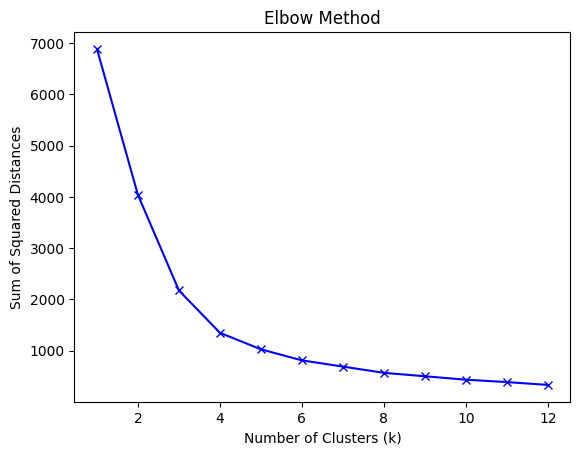

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


ssd = []

k_values = range(1, 13)

# Iterate over each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42 ,n_init= 10 )

    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


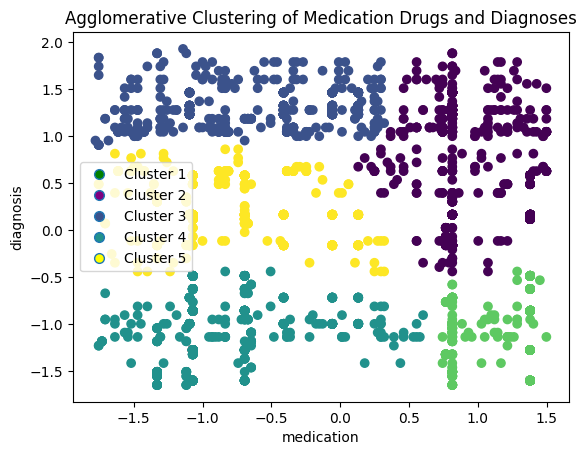

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('medication')
plt.ylabel('diagnosis')
plt.title('Agglomerative Clustering of Medication Drugs and Diagnoses')
# Add a legend to label the clusters
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
plt.legend(handles=[plt.Line2D([], [], marker='o', linestyle='None', markersize=7, markerfacecolor=c, label=l) for c, l in zip(['green', 'purple', '#3B528B','#21918C', 'yellow'], legend_labels)])

plt.show()

In [13]:

# new DataFrame with patient IDs, medication drugs, diagnoses, and cluster assignments
clustered_data = pd.DataFrame({'p_id': data['p_id'], 'medication_drug': data['medication_drug'],
                               'diagnosis': data['diagnosis'], 'cluster': clusters})

# Group the data by cluster and analyze the most common medication and diagnosis in each cluster
cluster_labels = {}
for cluster_id, cluster_data in clustered_data.groupby('cluster'):
    common_medication = cluster_data['medication_drug'].value_counts().idxmax()
    common_diagnosis = cluster_data['diagnosis'].value_counts().idxmax()
    cluster_labels[cluster_id] = f'Cluster {cluster_id + 1} (medication: {common_medication}, diagnosis: {common_diagnosis})'

# Print the cluster labels
for i, cluster in enumerate(clusters):
    print(f'Data point {i} belongs to {cluster_labels[cluster]}')
print(common_medication)
print(common_diagnosis)

Data point 0 belongs to Cluster 2 (medication: citalopram, diagnosis: Schizophrenia or other primary psychotic disorders, Schizophrenia, Schizophrenia, episode unspecified)
Data point 1 belongs to Cluster 5 (medication: acyclovir, diagnosis: Elimination disorders, Enuresis, Diurnal enuresis)
Data point 2 belongs to Cluster 5 (medication: acyclovir, diagnosis: Elimination disorders, Enuresis, Diurnal enuresis)
Data point 3 belongs to Cluster 2 (medication: citalopram, diagnosis: Schizophrenia or other primary psychotic disorders, Schizophrenia, Schizophrenia, episode unspecified)
Data point 4 belongs to Cluster 3 (medication: acyclovir, diagnosis: Catatonia, Catatonia associated with another mental disorder)
Data point 5 belongs to Cluster 2 (medication: citalopram, diagnosis: Schizophrenia or other primary psychotic disorders, Schizophrenia, Schizophrenia, episode unspecified)
Data point 6 belongs to Cluster 2 (medication: citalopram, diagnosis: Schizophrenia or other primary psychotic

In [14]:
print(common_medication)
print(common_diagnosis)

acyclovir
Elimination disorders, Enuresis, Diurnal enuresis
